# Smetric Insights  testing code

In [1]:
import requests
import json
from PyUnleashed import API
import sys
import pandas as pd
import time
import datetime
from pandaserd import ERD


In [2]:
firefox_headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}
urlParam =  "?"
url = "https://api.unleashedsoftware.com/"+ "Customers" + urlParam
apiId = "c4fb1319-bdb7-4c45-9097-2cf3ac5d46ba"
apiKey = '5hCLep58jP3phwoCnPvnRrBrXVyILNbB7CttxOwWxVGZg8Eg4Dcv50RkFjYUDyGlrPkRYRmfyMKpT27u5WrMQ=='

In [3]:
unlapi =  API(
            url = 'https://api.unleashedsoftware.com/',
            api_id = 'c4fb1319-bdb7-4c45-9097-2cf3ac5d46ba',
            api_key = '5hCLep58jP3phwoCnPvnRrBrXVyILNbB7CttxOwWxVGZg8Eg4Dcv50RkFjYUDyGlrPkRYRmfyMKpT27u5WrMQ=='
)

In [4]:
res = unlapi.get("Products").json()['Items']
df_Products = pd.DataFrame(data=res)
df_Products['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Products['CreatedOn']]
df_Products['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Products['LastModifiedOn']]
df_Products.to_csv("Products.csv")
df_Products.head()

,ProductCode,ProductDescription,Barcode,PackSize,Width,Height,Depth,Weight,MinStockAlertLevel,MaxStockAlertLevel,...,CreatedBy,CreatedOn,LastModifiedBy,CommerceCode,CustomsDescription,SupplementaryClassificationAbbreviation,ICCCountryCode,ICCCountryName,Guid,LastModifiedOn
0,BOOKSHELF,Wooden Bookshelf,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,871bcd30-c636-4fe2-a5a0-734bdf961b6c,2021-06-15 13:02:13.950
1,CHAIR,Lounge Chair,None,None,None,None,None,None,2.0,10.0,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,e57b4130-ca43-429d-9adf-2d88086d8b3d,2021-06-15 13:02:13.950
2,COUCH2,2-Seater Couch,None,None,None,None,None,None,10.0,60.0,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,92749139-34bf-44a7-bfb1-e0aff00e137a,2021-06-15 13:02:13.950
3,COUCH3,3-Seater Couch,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,74e86d55-dab8-4142-9f90-befd18e71b59,2021-06-15 13:02:13.950
4,DINING,Dining Table,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,7b0eda5d-b873-4cd5-8ca0-0d4d279bfbb8,2021-06-15 13:02:13.950


In [5]:
res = unlapi.get("Customers").json()['Items']
df_Customers = pd.DataFrame(data=res)
df_Customers['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Customers['CreatedOn']]
df_Customers['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Customers['LastModifiedOn']]
df_Customers.to_csv("Customers.csv")
df_Customers.head()

,Addresses,Contacts,TaxCode,TaxRate,CustomerCode,CustomerName,GSTVATNumber,BankName,BankBranch,BankAccount,...,CustomerType,PaymentTerm,ContactFirstName,ContactLastName,SourceId,CreatedBy,CreatedOn,LastModifiedBy,Guid,LastModifiedOn
0,[],[],,None,BENEMP,Ben's Emporium,None,None,None,None,...,On Account,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,tommywhy1989@gmail.com,f1cf4667-6c86-4a05-8794-7ff64a2fe74f,2021-06-17 22:43:25.677
1,[],[],,None,EMWAR,Emmanuel's Discount Warehouse,None,None,None,None,...,Wholesale,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,1ced0364-4788-42c9-9d2e-0ca40e30f16c,2021-06-15 13:02:13.946
2,[],[],,None,FRANCK,Franck & Co.,None,None,None,None,...,Cash,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,92cc4f48-4627-45fb-b95c-2358911c9060,2021-06-15 13:02:13.940
3,[],[],,None,GAR123,Garrick Inc.,None,None,None,None,...,Cash,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,1a2d2582-8fe3-4a19-9cdf-86ca44e1ee30,2021-06-15 13:02:13.943
4,[],[],,None,GBRO,Griffin Brothers Fabrication Ltd.,None,None,None,None,...,Wholesale,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,66b78e78-72de-4ce6-8273-4714d1eef780,2021-06-15 13:02:13.946


In [7]:
res = unlapi.get("PurchaseOrders").json()['Items']
df_PurchaseOrders = pd.DataFrame(data=res)
df_PurchaseOrders['OrderDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_PurchaseOrders['OrderDate']]
df_PurchaseOrders['RequiredDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_PurchaseOrders['RequiredDate']]
df_PurchaseOrders['DeliveryDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_PurchaseOrders['DeliveryDate']]
df_PurchaseOrders['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_PurchaseOrders['CreatedOn']]
df_PurchaseOrders['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_PurchaseOrders['LastModifiedOn']]


df_PurchaseOrders.to_csv("PurchaseOrders.csv")
df_PurchaseOrders.head()

,OrderNumber,OrderDate,RequiredDate,DeliveryDate,CompletedDate,Supplier,SupplierRef,Comments,Printed,OrderStatus,...,BCTotal,PurchaseOrderLines,Warehouse,DiscountRate,SalesOrders,CreatedOn,CreatedBy,LastModifiedBy,Guid,LastModifiedOn
0,PO-00000001,2019-06-16 13:02:13.916,2019-06-16 12:00:00,2019-06-16 12:00:00,None,{'Guid': 'cf966a19-db06-4e2e-a1d0-e0d065b85fac...,None,None,None,Complete,...,6495.20,[{'Guid': 'f2cdb632-a8d8-4483-82ec-c92d4c12c20...,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",0.0,[],2019-06-16 13:02:13.916,admin,admin,72436cb6-cfc9-4b22-9945-5641cbc2b5f6,2019-06-16 13:02:13.916
1,PO-00000002,2019-06-20 13:02:13.916,2019-06-20 12:00:00,2019-06-20 12:00:00,None,{'Guid': '7dc6dde2-7c66-4537-82df-5796f326ab20...,None,None,None,Complete,...,6083.85,[{'Guid': 'c942af82-4536-4fe6-aff3-898cd8e0d8f...,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",0.0,[],2019-06-20 13:02:13.916,admin,admin,efacba37-fd12-435c-aab8-7179f2cdba45,2019-06-20 13:02:13.916
2,PO-00000003,2019-06-21 13:02:13.916,2019-06-21 12:00:00,2019-06-21 12:00:00,None,{'Guid': 'd0ed3bac-fa69-46e8-8493-7849eca79561...,None,None,None,Complete,...,14079.14,[{'Guid': '085eefd2-c5e4-4285-a7ed-dccd7dfd160...,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",0.0,[],2019-06-21 13:02:13.916,admin,admin,8a9d120f-e456-4484-914c-103e28614d66,2019-06-21 13:02:13.916
3,PO-00000004,2019-06-21 13:02:13.916,2019-06-21 12:00:00,2019-06-21 12:00:00,None,{'Guid': 'fb61ebe2-b55f-48ee-b1af-cd4c804b7608...,None,None,None,Complete,...,3564.30,[{'Guid': '91b307ec-d502-4dbe-a2dd-0b8276f1e4c...,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",0.0,[],2019-06-21 13:02:13.916,admin,admin,b3fde574-b528-4b71-ba04-b3a0e90c1d76,2019-06-21 13:02:13.916
4,PO-00000005,2019-06-22 13:02:13.916,2019-06-22 12:00:00,2019-06-22 12:00:00,None,{'Guid': 'bfef6b07-62c2-475d-804f-49afb498ef95...,None,None,None,Complete,...,105037.55,[{'Guid': '1a2343bb-ac6f-4e24-b814-a6e14867dba...,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",0.0,[],2019-06-22 13:02:13.916,admin,admin,51cf7d76-8bb8-4816-a02c-ac03f5b6a526,2019-06-22 13:02:13.916


In [8]:
res = unlapi.get("BillOfMaterials").json()['Items']
df_BillOfMaterials = pd.DataFrame(data=res)

df_BillOfMaterials['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_BillOfMaterials['CreatedOn']]
df_BillOfMaterials['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_BillOfMaterials['LastModifiedOn']]


df_BillOfMaterials.to_csv("BillOfMaterials.csv")
df_BillOfMaterials.head()

,BillNumber,CanAutoAssemble,CanAutoDisassemble,SortByProductCode,Product,BillOfMaterialsLines,TotalCost,Obsolete,CreatedOn,CreatedBy,LastModifiedBy,AssemblyLayoutId,Guid,LastModifiedOn
0,BOM-00000001,True,False,True,"{'ProductCode': 'BOOKSHELF', 'ProductDescripti...","[{'LineNumber': 1, 'Product': {'ProductCode': ...",1790.71,False,2019-06-16 13:02:13.916,admin,admin,None,66be8445-ab6f-40c9-95cd-779ea971f9a8,2019-06-16 13:02:13.916


In [20]:
res = unlapi.get("SalesOrders").json()['Items']
df_SalesOrders = pd.DataFrame(data=res)

df_SalesOrders['OrderDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesOrders['OrderDate']]
df_SalesOrders['RequiredDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesOrders['RequiredDate']]
df_SalesOrders['CompletedDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesOrders['CompletedDate']]

df_SalesOrders['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesOrders['CreatedOn']]
df_SalesOrders['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesOrders['LastModifiedOn']]


df_SalesOrders.to_csv("SalesOrders.csv")
df_SalesOrders.head()

,SalesOrderLines,OrderNumber,OrderDate,RequiredDate,CompletedDate,OrderStatus,Customer,CustomerRef,Comments,Warehouse,...,SalesOrderGroup,DeliveryMethod,SalesPerson,SendAccountingJournalOnly,SourceId,CreatedBy,CreatedOn,LastModifiedBy,Guid,LastModifiedOn
0,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000123,2021-06-14 13:02:13.916,2021-06-14 13:02:13.916,2021-06-14 13:02:13.916,Completed,"{'CustomerCode': 'GAR123', 'CustomerName': 'Ga...",None,None,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",...,None,None,None,False,None,admin,2021-06-14 13:02:13.916,admin,9c659435-20b7-4a3d-b05d-707e6b47b0ef,2021-06-14 13:02:13.916
1,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000122,2021-06-13 13:02:13.916,2021-06-13 13:02:13.916,2021-06-13 13:02:13.916,Completed,"{'CustomerCode': 'SIREEN', 'CustomerName': 'Th...",None,None,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",...,None,None,None,False,None,admin,2021-06-13 13:02:13.916,admin,80dc68b6-5050-4f4f-a617-8ed5aa838a03,2021-06-13 13:02:13.916
2,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000121,2021-06-10 13:02:13.916,2021-06-10 13:02:13.916,2021-06-10 13:02:13.916,Completed,"{'CustomerCode': 'BENEMP', 'CustomerName': 'Be...",None,None,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",...,None,None,None,False,None,admin,2021-06-10 13:02:13.916,admin,5d0ee858-ac92-4eb1-8500-ed6f3e04d3b0,2021-06-10 13:02:13.916
3,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000120,2021-06-08 13:02:13.916,2021-06-08 13:02:13.916,2021-06-08 13:02:13.916,Completed,"{'CustomerCode': 'LMH001', 'CustomerName': 'LM...",None,None,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",...,None,None,None,False,None,admin,2021-06-08 13:02:13.916,admin,0cb4d99e-088b-4ea2-a2c9-ceba78d6345d,2021-06-08 13:02:13.916
4,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000119,2021-06-05 13:02:13.916,2021-06-05 13:02:13.916,2021-06-05 13:02:13.916,Completed,"{'CustomerCode': 'MATSUP', 'CustomerName': 'Ma...",None,None,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",...,None,None,None,False,None,admin,2021-06-05 13:02:13.916,admin,cc80a652-4efc-4235-92d2-e31b316c7e8a,2021-06-05 13:02:13.916


In [10]:
res = unlapi.get("Salespersons").json()['Items']
df_Salespersons = pd.DataFrame(data=res)
df_Salespersons['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Salespersons['LastModifiedOn']]

df_Salespersons.to_csv("Salespersons.csv")
df_Salespersons.head()

,FullName,Email,Obsolete,Guid,LastModifiedOn
0,John Smith,johh.smith@unleashedsoftware.com,False,b4e75e09-b480-4599-a327-2a6517e3ef4f,2019-06-16 13:02:13.916


In [11]:
res = unlapi.get("SalesShipments").json()['Items']
df_SalesShipments = pd.DataFrame(data=res)

df_SalesShipments['DispatchDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesShipments['DispatchDate']]
df_SalesShipments['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesShipments['CreatedOn']]

df_SalesShipments['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_SalesShipments['LastModifiedOn']]

df_SalesShipments.to_csv("SalesShipments.csv")
df_SalesShipments.head()

,OrderNumber,OrderGuid,ShipmentNumber,ShipmentStatus,DispatchDate,TrackingNumber,ShippingCompany,Comments,CreatedOn,CreatedBy,LastModifiedBy,SalesShipmentLines,Guid,LastModifiedOn
0,SO-00000123,9c659435-20b7-4a3d-b05d-707e6b47b0ef,SS-00000123,Dispatched,2021-06-14 12:00:00,None,None,None,2021-06-14 13:02:13.916,admin,admin,"[{'LineNumber': 1, 'Product': {'Guid': 'fa8403...",2dad724a-4221-4484-b0c1-ad8cff74159e,2021-06-14 13:02:13.916
1,SO-00000122,80dc68b6-5050-4f4f-a617-8ed5aa838a03,SS-00000122,Dispatched,2021-06-13 12:00:00,None,None,None,2021-06-13 13:02:13.916,admin,admin,"[{'LineNumber': 1, 'Product': {'Guid': 'e57b41...",80d4bb85-2942-44a6-89a0-bdd2de026321,2021-06-13 13:02:13.916
2,SO-00000121,5d0ee858-ac92-4eb1-8500-ed6f3e04d3b0,SS-00000121,Dispatched,2021-06-10 12:00:00,None,None,None,2021-06-10 13:02:13.916,admin,admin,"[{'LineNumber': 1, 'Product': {'Guid': '861fd4...",72b71ade-8617-489d-8684-0bd17aece3b4,2021-06-10 13:02:13.916
3,SO-00000120,0cb4d99e-088b-4ea2-a2c9-ceba78d6345d,SS-00000120,Dispatched,2021-06-08 12:00:00,None,None,None,2021-06-08 13:02:13.916,admin,admin,"[{'LineNumber': 1, 'Product': {'Guid': 'db6978...",22e9622e-fc85-4c80-83c6-d67167406565,2021-06-08 13:02:13.916
4,SO-00000119,cc80a652-4efc-4235-92d2-e31b316c7e8a,SS-00000119,Dispatched,2021-06-05 12:00:00,None,None,None,2021-06-05 13:02:13.916,admin,admin,"[{'LineNumber': 1, 'Product': {'Guid': 'fa8403...",0498363b-5eeb-4e40-b840-e6480a5771a0,2021-06-05 13:02:13.916


In [12]:
res = unlapi.get("StockAdjustments").json()['Items']
df_StockAdjustments = pd.DataFrame(data=res)

df_StockAdjustments['AdjustmentDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_StockAdjustments['AdjustmentDate']]
df_StockAdjustments['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_StockAdjustments['CreatedOn']]

df_StockAdjustments['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_StockAdjustments['LastModifiedOn']]

df_StockAdjustments.to_csv("StockAdjustments.csv")
df_StockAdjustments.head()

,AdjustmentNumber,Warehouse,AdjustmentDate,AdjustmentReason,Status,StockAdjustmentLines,ConfirmedOn,ConfirmedBy,AccountCode,CreatedOn,CreatedBy,LastModifiedBy,Guid,LastModifiedOn
0,SA-00000001,"{'WarehouseCode': 'MAIN', 'WarehouseName': 'Ma...",2019-06-26 13:02:13.916,End of Season,Completed,"[{'LineNumber': 1, 'Product': {'Guid': '7b0eda...",None,None,,2019-06-26 13:02:13.916,admin,admin,23455c4f-1ef9-460d-b3c8-d7701b57f401,2019-06-26 13:02:13.916


In [13]:
res = unlapi.get("Assemblies").json()['Items']
df_Assemblies = pd.DataFrame(data=res)

df_Assemblies['AssemblyDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Assemblies['AssemblyDate']]
df_Assemblies['CreatedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Assemblies['CreatedOn']]

df_Assemblies['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Assemblies['LastModifiedOn']]

df_Assemblies.to_csv("Assemblies.csv")
df_Assemblies.head()

,AssemblyNumber,AssemblyDate,AssemblyType,AssemblyStatus,AutoAssembly,Quantity,Comments,CanAssembleQuantity,BatchNumbers,SerialNumbers,...,Total,TotalCost,DisassembleCostTotal,SupplierCostsTax,SupplierCostsSubTotal,LastModifiedBy,CreatedBy,CreatedOn,Guid,LastModifiedOn
0,ASM-00000005,2021-06-03 13:02:13.916,Assembly,Completed,True,1.0,Created for Invoice SO-00000118.,13.8,None,None,...,1790.71,1790.71,None,0.0,0.0,admin,admin,2021-06-03 13:02:13.916,51ccfbc1-5b3d-437f-8896-e065b1326a1e,2021-06-03 13:02:13.916
1,ASM-00000004,2021-05-31 13:02:13.916,Assembly,Completed,True,5.0,Created for Invoice SO-00000117.,17.8,None,None,...,8953.56,8953.56,None,0.0,0.0,admin,admin,2021-05-31 13:02:13.916,af8ba4c2-4c12-408b-a601-a590071e1c51,2021-05-31 13:02:13.916
2,ASM-00000003,2021-05-09 13:02:13.916,Assembly,Completed,True,5.0,Created for Invoice SO-00000110.,17.8,None,None,...,8953.56,8953.56,None,0.0,0.0,admin,admin,2021-05-09 13:02:13.916,31ee797e-7601-4950-91a2-b0471c03a870,2021-05-09 13:02:13.916
3,ASM-00000002,2021-05-03 13:02:13.916,Assembly,Completed,True,7.0,Created for Invoice SO-00000109.,19.8,None,None,...,12534.99,12534.99,None,0.0,0.0,admin,admin,2021-05-03 13:02:13.916,73caed4d-3bae-450a-9480-6b1d436b503e,2021-05-03 13:02:13.916
4,ASM-00000001,2021-03-16 14:02:13.916,Assembly,Completed,True,1.0,Created for Invoice SO-00000101.,13.8,None,None,...,1790.71,1790.71,None,0.0,0.0,admin,admin,2021-03-16 14:02:13.916,c6dec7ea-d8ec-4c24-8d8b-8ce87273b81f,2021-03-16 14:02:13.916


In [116]:
res = unlapi.get("Invoices").json()['Items']
df_Invoices = pd.DataFrame(data=res)

df_Invoices['InvoiceDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Invoices['InvoiceDate']]
df_Invoices['DueDate'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Invoices['DueDate']]
df_Invoices['LastModifiedOn'] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  df_Invoices['LastModifiedOn']]

df_Invoices['Products_ProductCode'] =[[] for i in range( len(df_Invoices["InvoiceLines"]))]
for i,value in df_Invoices["InvoiceLines"].items():
    for j in range(len(value)) :
        df_Invoices['Products_ProductCode'][i].append( value[j]['Product']['ProductCode'])

df_Invoices.to_csv("Invoices.csv")
df_Invoices.head()

,InvoiceNumber,OrderNumber,QuoteNumber,InvoiceDate,DueDate,InvoiceStatus,Customer,Comments,PostalAddress,DeliveryAddress,...,Total,BCSubTotal,BCTaxTotal,BCTotal,CreatedBy,PaymentTerm,InvoiceLines,Guid,LastModifiedOn,Products_ProductCode
0,SI-00000123,SO-00000123,None,2021-06-14 13:02:13.916,2021-07-14 13:02:13.916,Completed,"{'CustomerCode': 'GAR123', 'CustomerName': 'Ga...",None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,4788.03,4386.33,657.95,5044.28,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",8bd5b1cd-3d9d-49d8-ab79-9b2cb24ab870,2021-06-14 13:02:13.916,"[SHELF, STAIN, COUCH2]"
1,SI-00000122,SO-00000122,None,2021-06-13 13:02:13.916,2021-07-13 13:02:13.916,Completed,"{'CustomerCode': 'SIREEN', 'CustomerName': 'Th...",None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,22977.00,44959.50,6743.93,51703.43,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",7deb9836-1941-458b-bde7-beef5f6af037,2021-06-13 13:02:13.916,[CHAIR]
2,SI-00000121,SO-00000121,None,2021-06-10 13:02:13.916,2021-07-10 13:02:13.916,Completed,"{'CustomerCode': 'BENEMP', 'CustomerName': 'Be...",None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,19538.50,16990.00,2548.50,19538.50,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",73ebefc8-6548-4ef6-a08a-f40565106fd3,2021-06-10 13:02:13.916,[SIDE]
3,SI-00000120,SO-00000120,None,2021-06-08 13:02:13.916,2021-07-08 13:02:13.916,Completed,"{'CustomerCode': 'LMH001', 'CustomerName': 'LM...",None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,1770.00,1770.00,0.00,1770.00,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",9a2a6dad-970a-4668-8a24-3521e64bfaa2,2021-06-08 13:02:13.916,[STAIN]
4,SI-00000119,SO-00000119,None,2021-06-05 13:02:13.916,2021-07-05 13:02:13.916,Completed,"{'CustomerCode': 'MATSUP', 'CustomerName': 'Ma...",None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,3592.31,3290.93,493.64,3784.57,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",21bbcdc7-3220-4eeb-98f9-583ddbc31b77,2021-06-05 13:02:13.916,[SHELF]


# ERD

In [129]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg


In [123]:
erd = ERD()

t_Invoices = erd.add_table(df_Invoices, 'Invoices', bg_color='gold')
t_SalesOrders = erd.add_table(df_SalesOrders, 'SalesOrders', bg_color='pink')
t_Products = erd.add_table(df_Products, 'Products', bg_color='lightblue')
t_Customers = erd.add_table(df_Customers, 'Customers', bg_color='skyblue')

erd.create_rel('Invoices', 'SalesOrders', on='OrderNumber', right_cardinality='*')
erd.create_rel('Invoices', 'SalesOrders', on='Customer', right_cardinality='*')
erd.create_rel('Invoices', 'Customers', on='Guid', right_cardinality='*')
erd.create_rel('Invoices', 'Products',  left_on='Products_ProductCode', right_on='ProductCode', right_cardinality='*')

erd.write_to_file('test.txt')



written to test.txt; visit https://edotor.net/ to render ERD


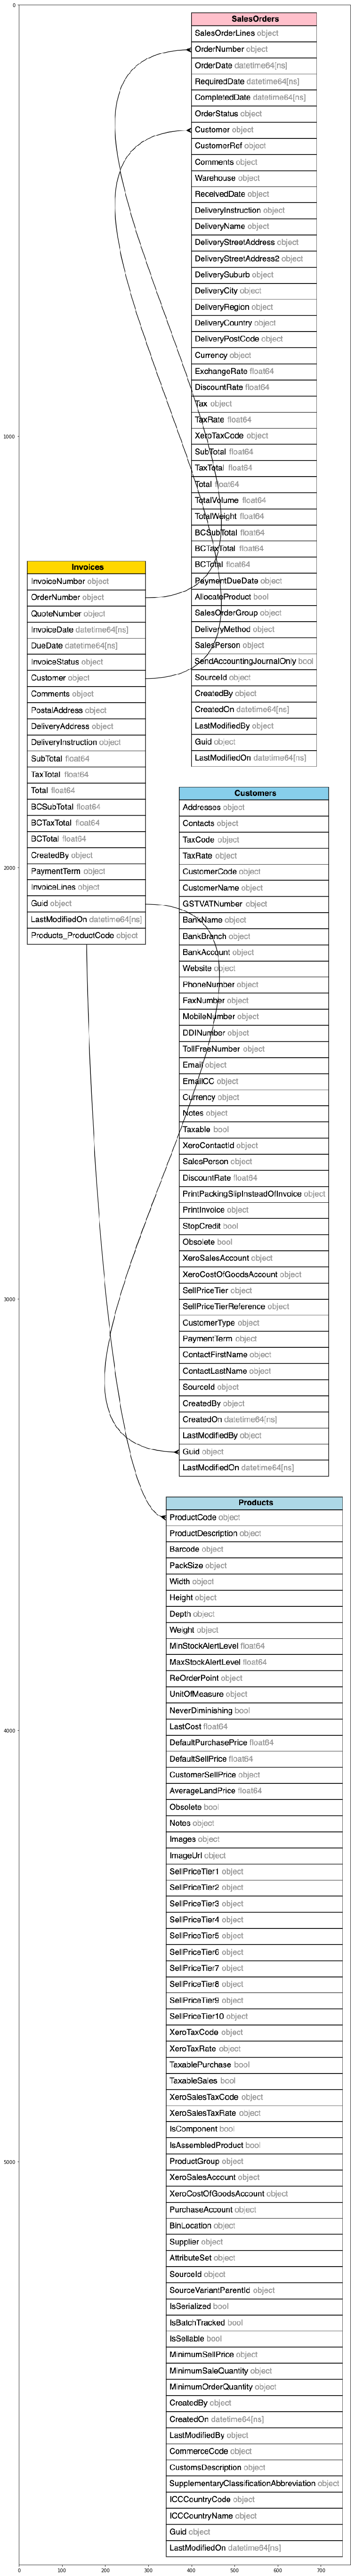

In [140]:
fig = plt.gcf()
fig.set_size_inches(180, 100)
I = mpimg.imread('./graph.png')
plt.imshow(I)